# EDA for Weather in Myanmar

Created by Elianneth Cabrera
04/07/2023

In [6]:
!pip install numpy

In [7]:
#importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [8]:
#loading the data
def load_data():
    data = pd.read_csv('https://raw.githubusercontent.com/OmdenaAI/myanmar-weather-forecasting/main/data/weather/open_meteo.csv?token=GHSAT0AAAAAACDV6JUFSOYW4R4KCM2H6FGGZFLNT4Q')
    return data

data= load_data()  
data.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,1,30.3,17.2,23.5,31.5,17.7,23.9,2010-01-01T00:04,2010-01-01T11:13,...,0.0,9.3,18.7,316,4.14,16.800003,96.20001,12.0,Myanmar,Yangoon
1,2010-01-02,1,30.9,16.8,23.6,30.6,16.6,23.4,2010-01-02T00:04,2010-01-02T11:13,...,0.0,12.8,27.7,342,4.77,16.800003,96.20001,12.0,Myanmar,Yangoon
2,2010-01-03,1,30.7,17.7,23.5,30.1,16.1,22.6,2010-01-03T00:05,2010-01-03T11:14,...,0.0,13.3,26.6,338,4.96,16.800003,96.20001,12.0,Myanmar,Yangoon
3,2010-01-04,3,30.8,17.6,24.2,30.7,16.8,24.2,2010-01-04T00:05,2010-01-04T11:14,...,0.0,12.1,25.6,327,4.57,16.800003,96.20001,12.0,Myanmar,Yangoon
4,2010-01-05,3,31.4,21.0,25.8,32.9,21.9,27.2,2010-01-05T00:05,2010-01-05T11:15,...,0.0,8.9,22.0,351,3.65,16.800003,96.20001,12.0,Myanmar,Yangoon


In [9]:
data.dtypes

time                           object
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                  float64
precipitation_hours           float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                     float64
country                        object
city                           object
dtype: object

In [10]:
#converting columns to datetime
data['time']= pd.to_datetime(data['time'])
data['sunrise']= pd.to_datetime(data['sunrise'])
data['sunset']= pd.to_datetime(data['sunset'])

In [11]:
data.dtypes

time                          datetime64[ns]
weathercode                            int64
temperature_2m_max                   float64
temperature_2m_min                   float64
temperature_2m_mean                  float64
apparent_temperature_max             float64
apparent_temperature_min             float64
apparent_temperature_mean            float64
sunrise                       datetime64[ns]
sunset                        datetime64[ns]
shortwave_radiation_sum              float64
precipitation_sum                    float64
rain_sum                             float64
snowfall_sum                         float64
precipitation_hours                  float64
windspeed_10m_max                    float64
windgusts_10m_max                    float64
winddirection_10m_dominant             int64
et0_fao_evapotranspiration           float64
latitude                             float64
longitude                            float64
elevation                            float64
country   

In [12]:
#quick stadistic for the dataframe
data.describe()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.000000,49160.0,49160.000000,49160.000000,49160.000000,49160.000000,49159.000000,49160.000000,49160.000000,49160.000000
mean,33.857059,29.542915,20.791481,24.853009,33.169434,23.647325,27.976263,17.550412,5.536859,5.536859,0.0,6.172539,10.976257,29.554048,202.271562,3.802507,19.480003,96.770004,351.400000
std,28.346242,4.057097,4.564320,3.794812,5.265635,6.500045,5.357638,5.265606,10.746810,10.746810,0.0,7.791999,4.635709,8.671707,88.633301,1.379380,3.109951,2.017967,486.853635
min,0.000000,5.100000,3.500000,4.700000,2.700000,1.100000,2.200000,1.200000,0.000000,0.000000,0.0,0.000000,2.300000,9.000000,0.000000,0.350000,12.400002,92.399994,6.000000
25%,1.000000,27.100000,17.800000,22.500000,30.100000,19.200000,24.200000,14.550000,0.000000,0.000000,0.0,0.000000,7.600000,23.000000,152.000000,2.930000,16.900002,96.100006,12.000000
50%,51.000000,29.600000,22.000000,25.600000,33.800000,25.400000,29.500000,18.000000,0.500000,0.500000,0.0,2.000000,10.200000,28.400000,199.000000,3.710000,20.500004,96.650008,83.000000
75%,61.000000,31.800000,24.400000,27.300000,37.000000,29.000000,32.000000,21.370000,6.900000,6.900000,0.0,11.000000,13.500000,34.900000,270.000000,4.650000,21.400002,98.600006,787.000000
max,65.000000,42.900000,30.700000,36.500000,46.300000,35.300000,38.800000,29.660000,193.100000,193.100000,0.0,24.000000,57.600000,116.300000,360.000000,10.070000,23.800003,99.700010,1407.000000


In [13]:
#drop the snow column, since we don't have snow in the country
data.drop('snowfall_sum', axis=1, inplace= True)

## Feature Engineering

We are going to do a ligth small feature engineering for make our analysis more clear.

In [14]:
#adding columns year and month to the dataframe
data['year']= data['time'].dt.year
data['month']= data['time'].dt.month

In [15]:
#cheking if the 'precipitation_sum' and 'rain_sum' columns are equal
print(data['precipitation_sum'].equals(data['rain_sum']))

True


In [16]:
#dropping the rain sum column
data.drop('rain_sum', axis=1, inplace=True)

In [17]:
data.dtypes 

time                          datetime64[ns]
weathercode                            int64
temperature_2m_max                   float64
temperature_2m_min                   float64
temperature_2m_mean                  float64
apparent_temperature_max             float64
apparent_temperature_min             float64
apparent_temperature_mean            float64
sunrise                       datetime64[ns]
sunset                        datetime64[ns]
shortwave_radiation_sum              float64
precipitation_sum                    float64
precipitation_hours                  float64
windspeed_10m_max                    float64
windgusts_10m_max                    float64
winddirection_10m_dominant             int64
et0_fao_evapotranspiration           float64
latitude                             float64
longitude                            float64
elevation                            float64
country                               object
city                                  object
year      

## Analisys of the data

[Text(0, 0, 'Temperature 2m max'),
 Text(0, 1, 'Temperature 2m min'),
 Text(0, 2, 'Temperature 2m mean'),
 Text(0, 3, 'Apparent temperature max'),
 Text(0, 4, 'Apparent temperature min'),
 Text(0, 5, 'Apparent temperature mean')]

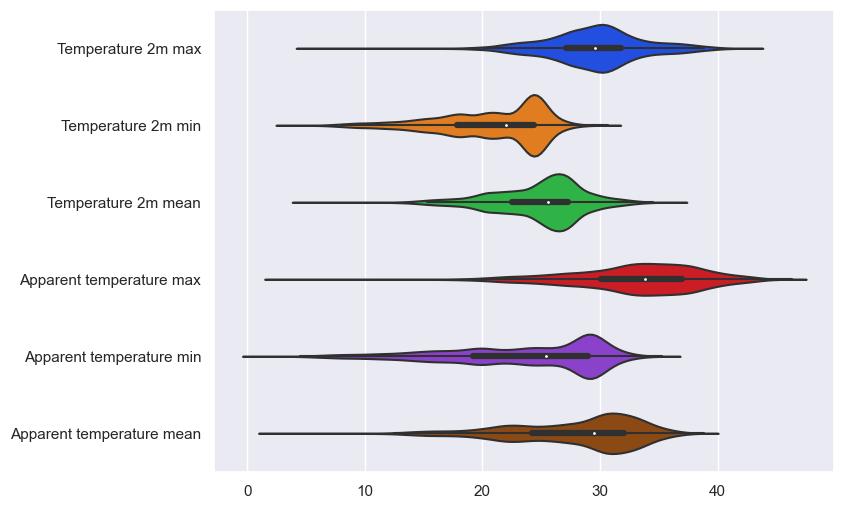

In [18]:
#box plot to see the distribuion of trend of the temperature data
sns.set(rc = {'figure.figsize':(8,6)})
label= ['Temperature 2m max', 'Temperature 2m min', 'Temperature 2m mean', 'Apparent temperature max',
        'Apparent temperature min', 'Apparent temperature mean']
g= sns.violinplot(data.iloc[:, 2:8], palette='bright', flierprops={"marker": "x"},
               medianprops={"color": "red"}, orient= 'h')
g.set_yticklabels(labels= label)

In the plot above, we see:

1. In the average maximum temperature, most of the data is centered in the 25 to 35 ºC range. The average is approximately 30ºC.

2. The minimum temperature varies from 4ºC to 31ºC.

3. The minimum, maximum and average apparent temperatures are higher than the values measured at 2 meters above ground level. This means that the temperature perception of the human body is higher.

4. The temperature ranges are extensive, probably because in each of the cities there is a different weather, so we will proceed to analyze the different climatic factors by city.

[Text(0, 0, 'Total Precipitation'),
 Text(0, 1, 'Precipitation hours'),
 Text(0, 2, 'Max Windspeed at 10m'),
 Text(0, 3, 'Max Windgusts at 10m')]

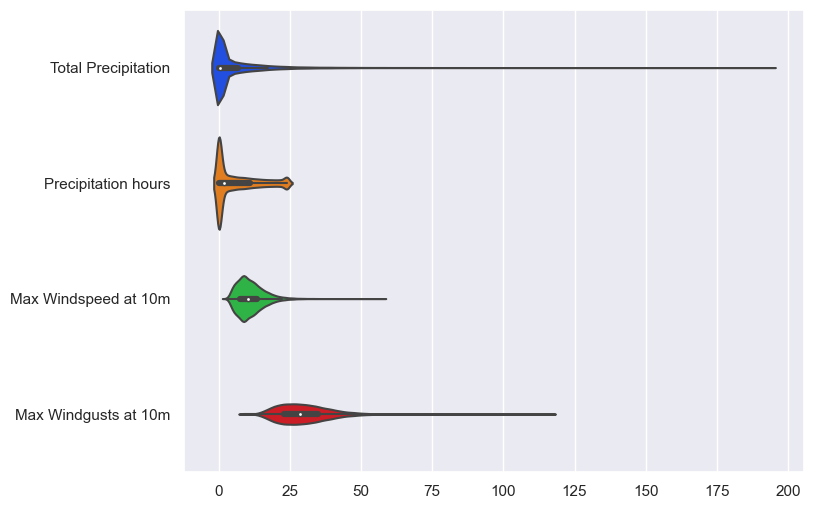

In [19]:
#box plot to see the distribuion of trend of the precipitation, rain, snow and wind speed data
sns.set(rc = {'figure.figsize':(8,6)})
label= ['Total Precipitation', 'Precipitation hours', 'Max Windspeed at 10m',	'Max Windgusts at 10m']
g= sns.violinplot(data.iloc[:, 11:15], palette='bright', orient='h', flierprops={"marker": "x"},
               medianprops={"color": "yellow"})
g.set_yticklabels(labels= label)

In the plot above, we can see:

1. The precipitation graph has a greater dispersion of the data. This is probably due to the fact that this has a seasonality in which it is more frequent. This can be seen in the descriptive statistics of our table in which we observe that the minimum and maximum are 0 and 193, respectively.

2. The precipitation hours have an average of almost 7 hours and a maximum of up to 24 hours. The data has a smaller dispersion.

3. The wind speed and values are also scattered, probably also influenced by the seasons.

### Correlation of the data

In [20]:
corr_data= data.iloc[: , [4,7,10,11,12,13,14, 19]]
#calculate de correlation for the features
print(corr_data.corr())

                           temperature_2m_mean  apparent_temperature_mean  \
temperature_2m_mean                   1.000000                   0.946863   
apparent_temperature_mean             0.946863                   1.000000   
shortwave_radiation_sum               0.350315                   0.155212   
precipitation_sum                     0.007605                   0.146516   
precipitation_hours                   0.005185                   0.204672   
windspeed_10m_max                     0.385635                   0.297988   
windgusts_10m_max                     0.109977                   0.059783   
elevation                            -0.677209                  -0.675612   

                           shortwave_radiation_sum  precipitation_sum  \
temperature_2m_mean                       0.350315           0.007605   
apparent_temperature_mean                 0.155212           0.146516   
shortwave_radiation_sum                   1.000000          -0.586552   
precipitation_

### Distribution of the data by city

We are goin to see how the data is distributed by city in the columns:

1. temperature_2m_mean

2. apparent_temperature_mean

3. precipitation_sum

4. windspeed_10m_max

5. windgusts_10m_max

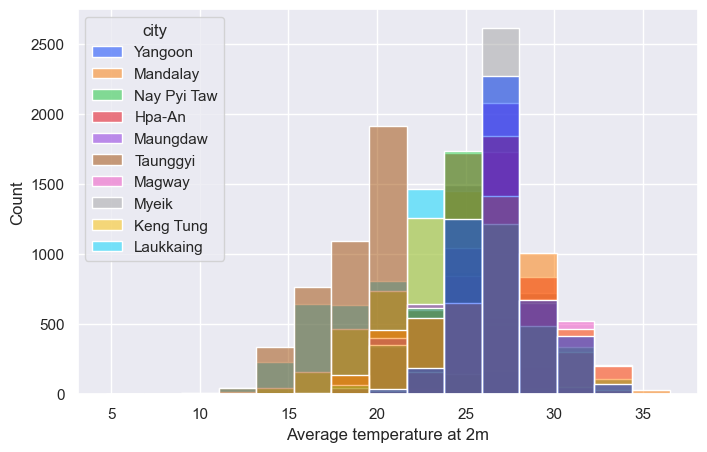

In [21]:
#histplot for temperature_2m_mean by city
sns.set(rc = {'figure.figsize':(8,5)})
g= sns.histplot(data=data, x="temperature_2m_mean", hue="city", bins= 15,  palette='bright')
g.set_xlabel('Average temperature at 2m')
plt.show()

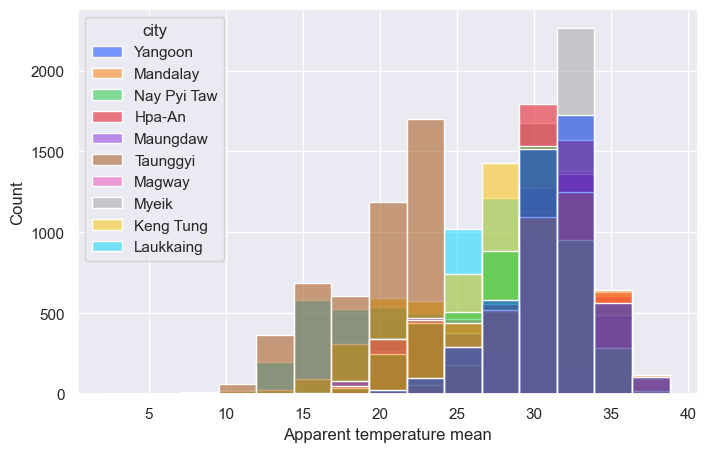

In [22]:
#histplot for temperature_2m_mean by city
sns.set(rc = {'figure.figsize':(8,5)})
g= sns.histplot(data=data, x="apparent_temperature_mean", hue="city", bins= 15,  palette='bright')
g.set_xlabel('Apparent temperature mean')
plt.show()

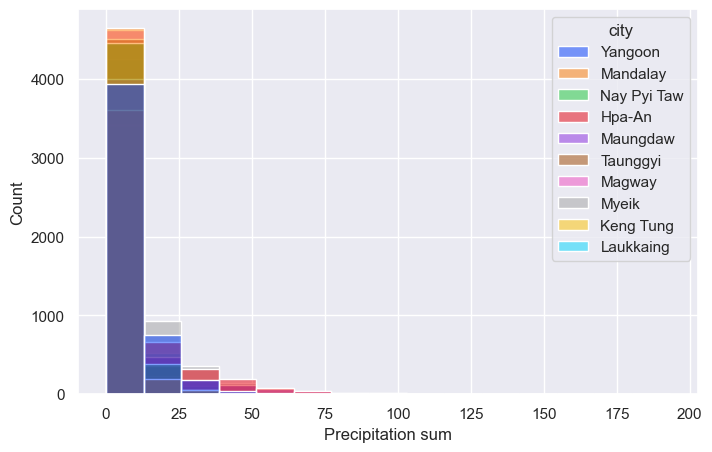

In [23]:
#histplot for temperature_2m_mean by city
sns.set(rc = {'figure.figsize':(8,5)})
g= sns.histplot(data=data, x="precipitation_sum", hue="city", bins= 15,  palette='bright')
g.set_xlabel('Precipitation sum')
plt.show()

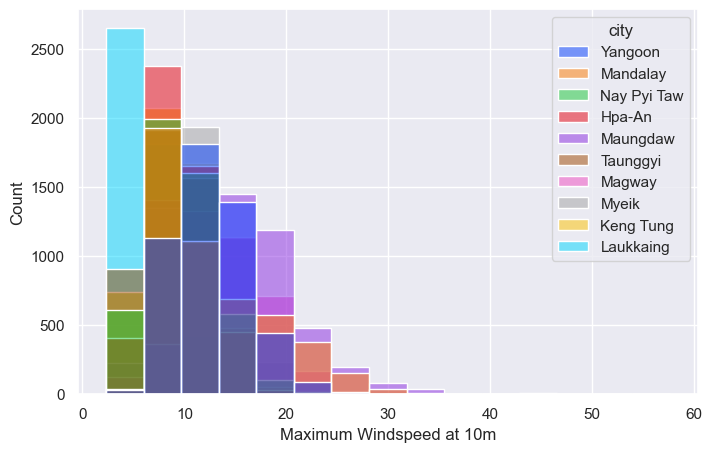

In [24]:
#histplot for temperature_2m_mean by city
sns.set(rc = {'figure.figsize':(8,5)})
g= sns.histplot(data=data, x="windspeed_10m_max", hue="city", bins= 15,  palette='bright')
g.set_xlabel('Maximum Windspeed at 10m')
plt.show()

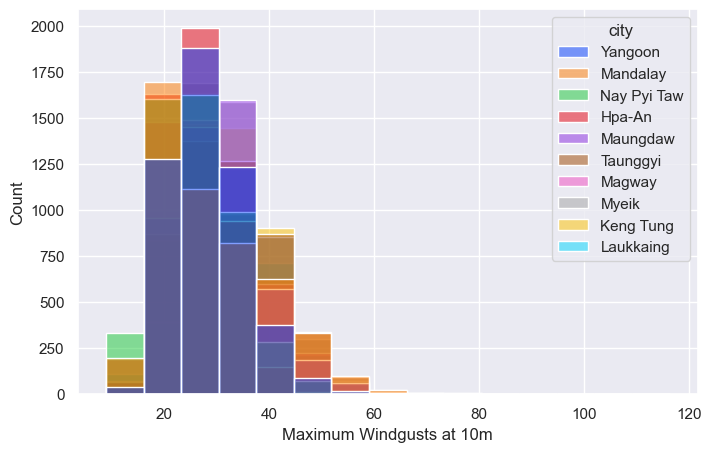

In [25]:
#histplot for temperature_2m_mean by city
sns.set(rc = {'figure.figsize':(8,5)})
g= sns.histplot(data=data, x="windgusts_10m_max", hue="city", bins= 15,  palette='bright')
g.set_xlabel('Maximum Windgusts at 10m')
plt.show()

In the 5 graphs above we can see that the data does not follow a normal distribution.

Precipitation, windspeed and windgusts are skewed to the left, a factor to take into account when creating the Machine Learning model.

The average temperature and apparent temperature are slightly skewed to the left.

We will use the median as a measure of trend.

## Analizing the temperature data

Firt we are going to see how the average temperatura has change in the 13 years of data that we have for each city. 

In [26]:
#change through years for average temperature in every city
#group by
temp_year_by_city= (
    data.groupby(['year', 'city'])['temperature_2m_mean'].median()
    .to_frame()
    .reset_index()
    .sort_values('year', ascending= True)
    .reset_index(drop=True)
)
temp_year_by_city.head()


,year,city,temperature_2m_mean
0,2010,Hpa-An,26.6
1,2010,Keng Tung,23.8
2,2010,Laukkaing,22.2
3,2010,Magway,27.2
4,2010,Mandalay,27.4


In [27]:
#create a pivot table
temp_by_year= temp_year_by_city.pivot(index= 'year', columns='city', values='temperature_2m_mean')
temp_by_year

city,Hpa-An,Keng Tung,Laukkaing,Magway,Mandalay,Maungdaw,Myeik,Nay Pyi Taw,Taunggyi,Yangoon
year,,,,,,,,,,
2010,26.60,23.8,22.20,27.20,27.4,26.50,26.9,25.8,20.00,26.9
2011,25.70,22.9,21.60,26.50,26.5,25.80,26.3,25.0,19.30,26.1
2012,26.30,23.3,21.60,26.65,26.9,26.00,26.4,25.5,19.50,26.6
2013,26.10,23.3,21.90,26.40,27.0,25.80,26.4,25.2,19.60,26.3
2014,26.20,23.5,22.00,26.80,27.3,26.30,26.5,25.6,19.70,26.6
2015,26.60,23.3,21.50,27.00,27.1,26.20,26.9,25.4,19.80,26.7
2016,26.35,23.8,22.00,27.00,27.2,26.40,26.8,25.5,20.00,26.7
2017,26.80,23.2,21.70,26.70,26.8,26.20,26.6,25.4,19.70,26.8
2018,26.90,23.0,21.30,26.60,26.5,26.10,26.5,25.2,19.50,26.8


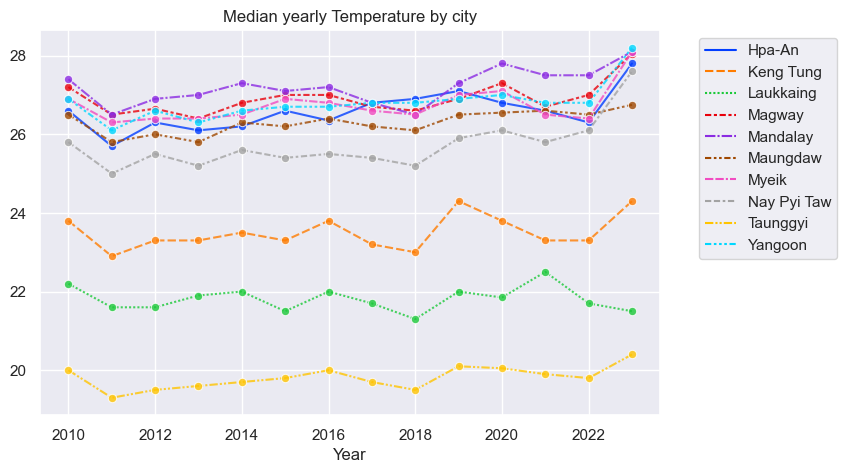

In [28]:
#creating the lineplot for average temperature in each year
g= sns.lineplot(temp_by_year, marker= 'o', alpha= 0.8, palette='bright')
g.set_xlabel('Year')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.title('Median yearly Temperature by city')
plt.show()

1. We can observe, that the temperature in Myanmar is probably in 4 groups.

2. The three cities with the lowest temperatures, in order, are: Taunggyi, Laukkaing and Keng Tung.

3. The remainder of the 7 cities have relatively similar temperature ranges, with values from 25°C to 30°C.

4. The city reporting the highest average temperatures is Yangoon.

In [29]:
#change in every month for average temperature in every city
#group by
temp_month_by_city= (
    data.groupby(['month', 'city'])['temperature_2m_mean'].median()
    .to_frame()
    .reset_index()
    .sort_values('month', ascending= True)
    .reset_index(drop=True)
)
temp_month_by_city.head()


,month,city,temperature_2m_mean
0,1,Hpa-An,25.5
1,1,Keng Tung,18.9
2,1,Laukkaing,15.8
3,1,Magway,21.6
4,1,Mandalay,20.7


In [30]:
#create a pivot table
temp_by_month= temp_month_by_city.pivot(index= 'month', columns='city', values='temperature_2m_mean')
temp_by_month

city,Hpa-An,Keng Tung,Laukkaing,Magway,Mandalay,Maungdaw,Myeik,Nay Pyi Taw,Taunggyi,Yangoon
month,,,,,,,,,,
1,25.5,18.90,15.8,21.6,20.70,21.3,26.8,21.5,15.3,24.70
2,26.9,21.50,18.3,24.3,23.60,23.1,27.5,23.9,17.4,26.40
3,28.9,24.90,21.9,28.6,28.30,26.2,28.1,28.0,20.7,28.90
4,30.1,26.75,23.7,31.4,31.30,28.2,28.2,30.7,22.4,30.75
5,27.7,26.10,24.0,31.1,30.45,28.8,27.3,29.0,21.9,29.10
6,25.6,24.80,23.3,27.6,28.60,26.8,26.2,26.0,20.9,26.70
7,25.1,24.20,22.9,27.1,28.00,26.4,25.8,25.4,20.4,26.20
8,25.0,24.10,23.1,27.0,27.40,26.4,25.6,25.3,20.1,25.90
9,25.7,24.20,23.1,27.2,27.50,26.7,25.5,26.0,20.2,26.40


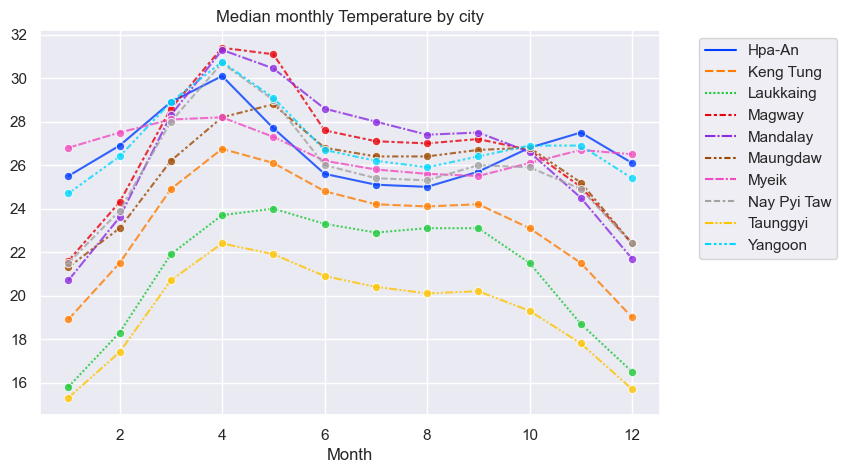

In [31]:
#lineplot for avergae temperature in each month
label= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ag', 'Sept', 'Oct', 'Nov', 'Dic']

g= sns.lineplot(temp_by_month, marker= 'o', alpha= 0.8, palette='bright')
g.set_xlabel('Month')
plt.title('Median monthly Temperature by city')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.show()

1. In the previous graph we can see that the highest temperature peaks are from month 4 (April), from this point they begin to decrease. However, in months 8 and 9 we can see a small increase in temperature.

2. The lowest temperatures are from November to December.

## Analizing the Precipitation data

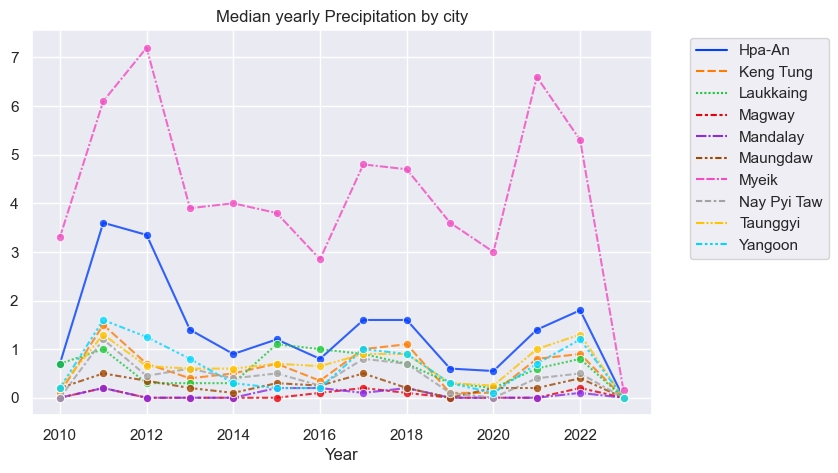

In [32]:
#change through years for average precipitation in every city
#group by
prec_year_by_city= (
    data.groupby(['year', 'city'])['precipitation_sum'].median()
    .to_frame()
    .reset_index()
    .sort_values('year', ascending= True)
    .reset_index(drop=True)
)

#create a pivot table
prec_by_year= prec_year_by_city.pivot(index= 'year', columns='city', values='precipitation_sum')
prec_by_year

#creating the lineplot
g= sns.lineplot(prec_by_year, marker= 'o', alpha= 0.8, palette='bright')
g.set_xlabel('Year')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.title('Median yearly Precipitation by city')
plt.show()

1. As we can see in the plot above, rainfall behaves differently in each of the cities, they are mostly 3 groups.

2. The cities with the highest volume (mm) are: Myeik, Hpa-An,  Laukkaing and Yangoon.

3. The city with the lowest rainfall is Mandalay.

4. Let us see the monthly behavior of rainfall in each of the cities.

Text(0.5, 0, 'Month')

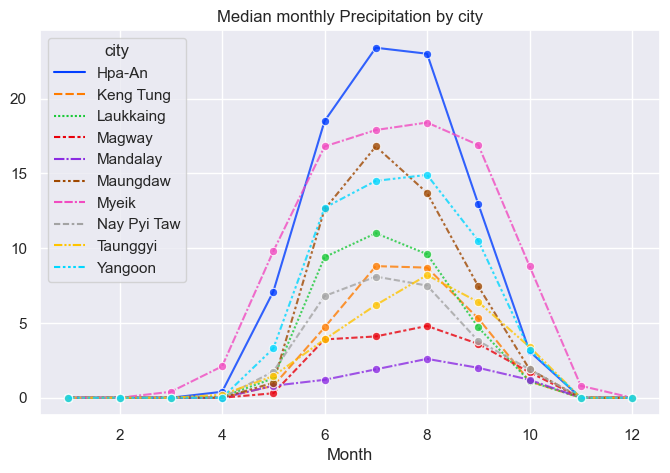

In [33]:
#change in evry month for average precipitation in every city
#group by
prec_month_by_city= (
    data.groupby(['month', 'city'])['precipitation_sum'].median()
    .to_frame()
    .reset_index()
    .sort_values('month', ascending= True)
    .reset_index(drop=True)
)

#create a pivot table
prec_by_month= prec_month_by_city.pivot(index= 'month', columns='city', values='precipitation_sum')
prec_by_month

#creating the lineplot
g= sns.lineplot(prec_by_month, marker= 'o', alpha= 0.8, palette='bright')
plt.title('Median monthly Precipitation by city')
g.set_xlabel('Month')

1. In the graph above we can see that the rainy season is between May and September, with July and August being the months with the highest rainfall.

2. Hpa-An still has the highest rainfall and Mandalay the lowest.

In [34]:
#relationship between temperature and precipitacion
#scatter plot for each city
temp_and_prec= data.groupby(['year', 'month', 'city'])[['temperature_2m_mean', 'precipitation_sum']].median()
temp_and_prec.reset_index()

,year,month,city,temperature_2m_mean,precipitation_sum
0,2010,1,Hpa-An,26.7,0.0
1,2010,1,Keng Tung,20.6,0.0
2,2010,1,Laukkaing,16.8,0.0
3,2010,1,Magway,23.8,0.0
4,2010,1,Mandalay,22.4,0.0
...,...,...,...,...,...
1615,2023,6,Maungdaw,27.7,7.2
1616,2023,6,Myeik,26.0,26.7
1617,2023,6,Nay Pyi Taw,27.6,4.3
1618,2023,6,Taunggyi,21.1,5.5


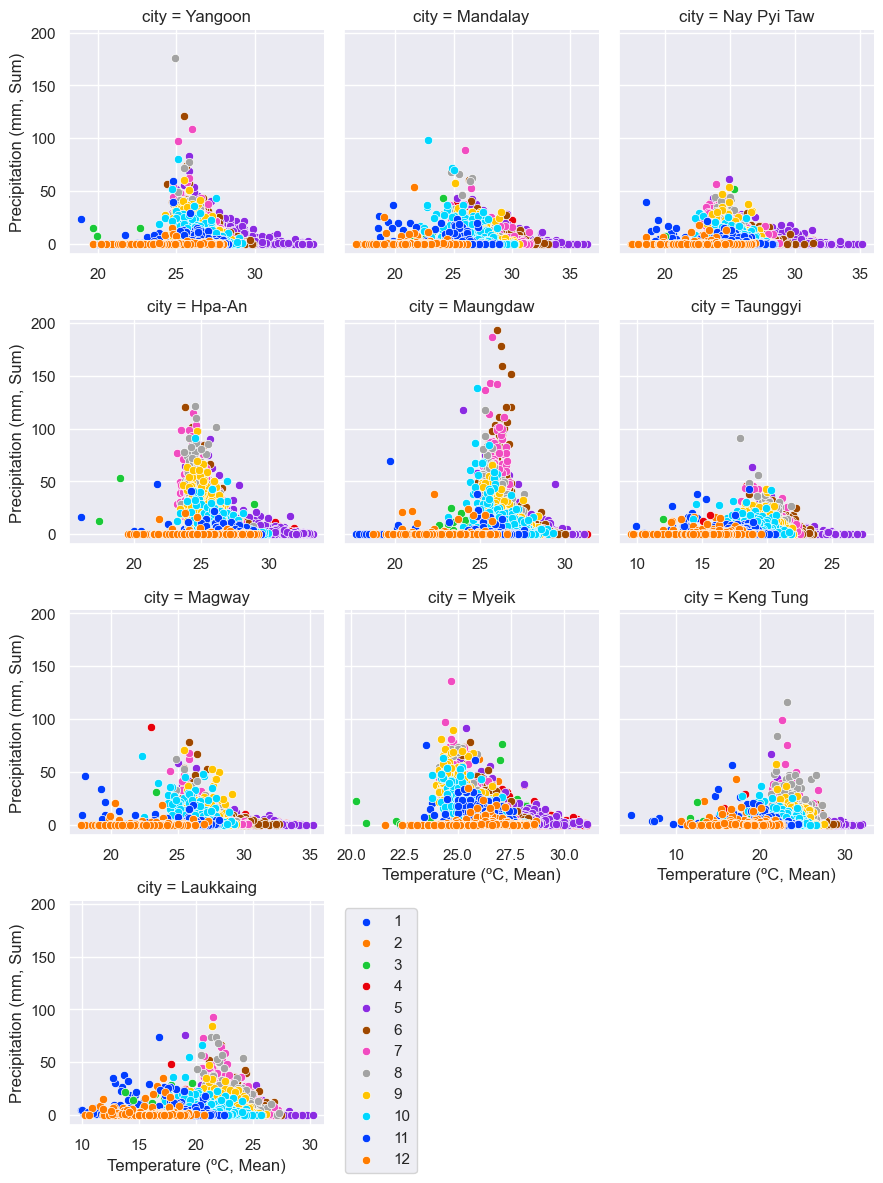

In [35]:
#scatter plot temperature vs. precipitation
# Create a scatter plot for each city
sns.set(style="ticks")
sns.set(rc = {'figure.figsize':(10,7)})
g = sns.FacetGrid(data=data, col="city", sharex= False, col_wrap=3, hue='month', palette='bright')
g.map(sns.scatterplot, "temperature_2m_mean", "precipitation_sum")

# Add labels and title
g.set_axis_labels("Temperature (ºC, Mean)", "Precipitation (mm, Sum)")
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.show()

The graph above shows the relationship between average temperature and total precipitation in each of the cities. The colors represent the months of the year, one for each month.

We can observe some peaks in the graphs for the months of June to September, in the cities Yangoon, Maungdaw, Myeik and Keng Tung.

On the X-axis (Temperature) the data are more clustered, but on the Y-axis they are more scattered.

In the graphs there is no obvious relationship between the variables.

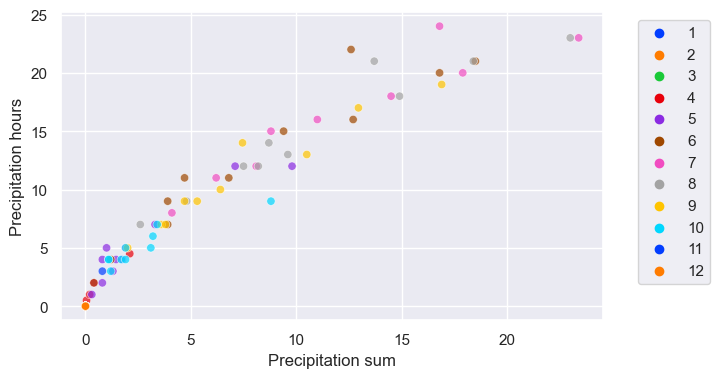

In [36]:
#lets see the relationship between the sum of precipitation and the hours.
#precipitation sum and hours in every city
#group the data
prec_sum_and_hours= data.groupby(['month', 'city'])[['precipitation_sum', 'precipitation_hours']].median()
prec_sum_and_hours.reset_index()

#scatterplot
sns.set(rc = {'figure.figsize':(7,4)})
g= sns.scatterplot(data= prec_sum_and_hours, x= 'precipitation_sum', y='precipitation_hours', palette= 'bright',
                      hue= 'month', alpha= 0.7)
g.set_xlabel('Precipitation sum')
g.set_ylabel('Precipitation hours')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.show()

In the graph above the colors represent the months of the year. We can see that there is a clear relationship between the number of hours of precipitation and the total volume of precipitation.

Their relationship is directly proportional.

Let's see the average rainfall and hours of precipitation in each of the cities.

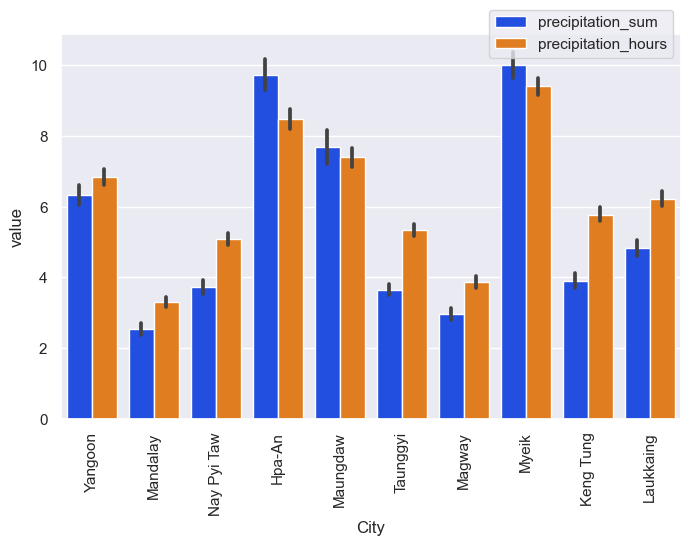

In [37]:
#bar plot for average precipitacion sum and total hours of rain
sns.set(rc = {'figure.figsize':(8, 5)})
df_melted = data.melt(id_vars='city', value_vars=['precipitation_sum', 'precipitation_hours'],
                                      var_name='variable', value_name='value')

label=list(df_melted['city'].unique())

# Creamos el gráfico de barras
g= sns.barplot(data=df_melted, x='city', y='value', hue='variable', palette='bright')
g.set_xticklabels(labels= label, rotation= 90)
g.set_xlabel('City')
plt.legend(loc= 'center right', bbox_to_anchor = (1,1))
plt.show()

In this bar plot we can see that, the city with higher number of precipitations hours are the ones with most volumen of rain.

## Analizing Windspeed and Windgust data

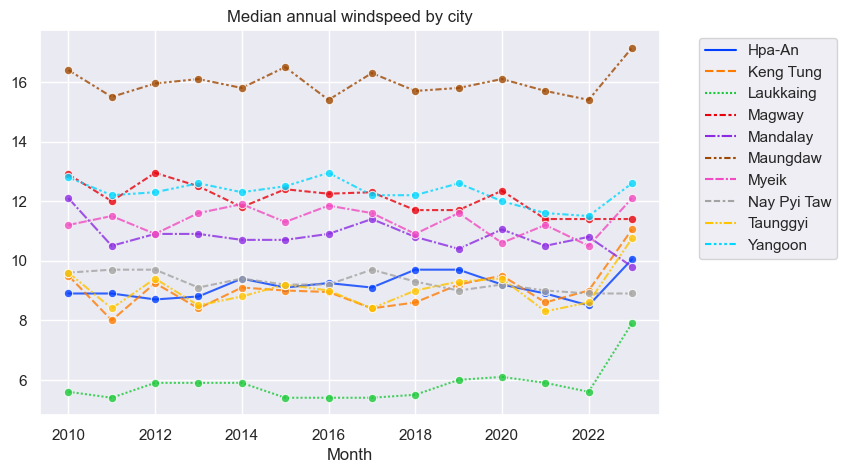

In [38]:
#change through years for average windspeed in every city
#group by
windspeed_year_by_city= (
    data.groupby(['year', 'city'])['windspeed_10m_max'].median()
    .to_frame()
    .reset_index()
    .sort_values('year', ascending= True)
    .reset_index(drop=True)
)

#create a pivot table
windspeed_by_year= windspeed_year_by_city.pivot(index= 'year', columns='city', values='windspeed_10m_max')
windspeed_by_year

#creating the lineplot
sns.set(rc = {'figure.figsize':(8, 5)})
g= sns.lineplot(windspeed_by_year, marker= 'o', alpha= 0.8, palette='bright')
g.set_xlabel('Month')
plt.title('Median annual windspeed by city')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.show()

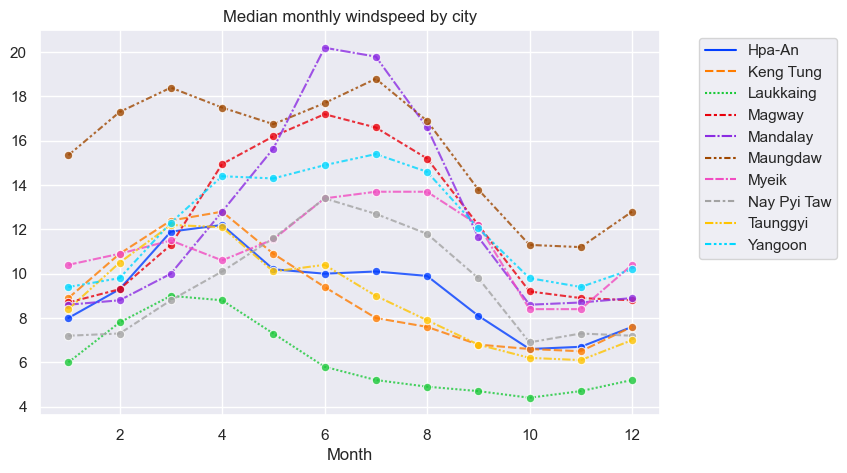

In [39]:
#change through years for average windspeed in every city
#group by
windspeed_year_by_city= (
    data.groupby(['month', 'city'])['windspeed_10m_max'].median()
    .to_frame()
    .reset_index()
    .sort_values('month', ascending= True)
    .reset_index(drop=True)
)

#create a pivot table
windspeed_by_year= windspeed_year_by_city.pivot(index= 'month', columns='city', values='windspeed_10m_max')
windspeed_by_year

#creating the lineplot
g= sns.lineplot(windspeed_by_year, marker= 'o', alpha= 0.8, palette='bright')
g.set_xlabel('Month')
plt.title('Median monthly windspeed by city')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.show()

In the annual graph we can observe 4 groups of cities with similar wind speeds.

The city with the highest wind speed in Moungdaw. In all years studied it was the one with a high trend.

In the monthly graph no specific pattern is noticed, however, in cities such as: Magway, Mandalay, Myeik, Yangoon and Nay Pyi Taw, it seems to coincide with the rainy season. 

We need to check if there is any relationship with wind speed, rainfall and the elevation at which the city is located.

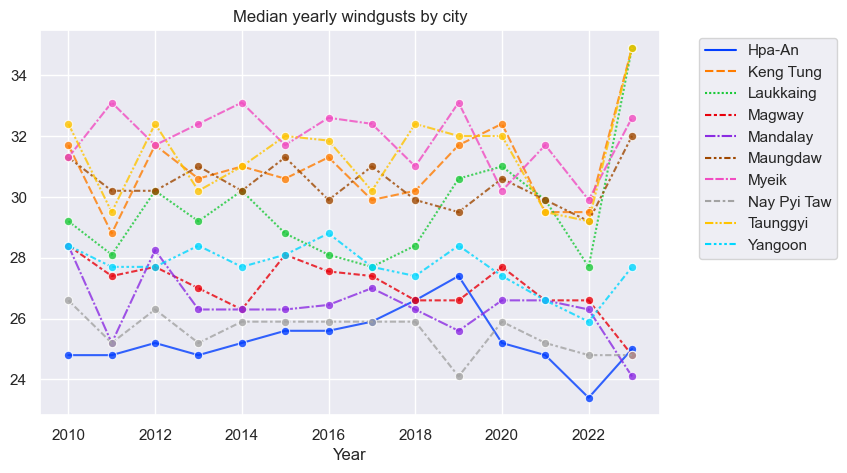

In [40]:
#change through years for average windsgust in every city
#group by
windgusts_year_by_city= (
    data.groupby(['year', 'city'])['windgusts_10m_max'].median()
    .to_frame()
    .reset_index()
    .sort_values('year', ascending= True)
    .reset_index(drop=True)
)

#create a pivot table
windgusts_by_year= windgusts_year_by_city.pivot(index= 'year', columns='city', values='windgusts_10m_max')
windgusts_by_year

#creating the lineplot
g= sns.lineplot(windgusts_by_year, marker= 'o', alpha= 0.8, palette='bright')
g.set_xlabel('Year')
plt.title('Median yearly windgusts by city')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.show()

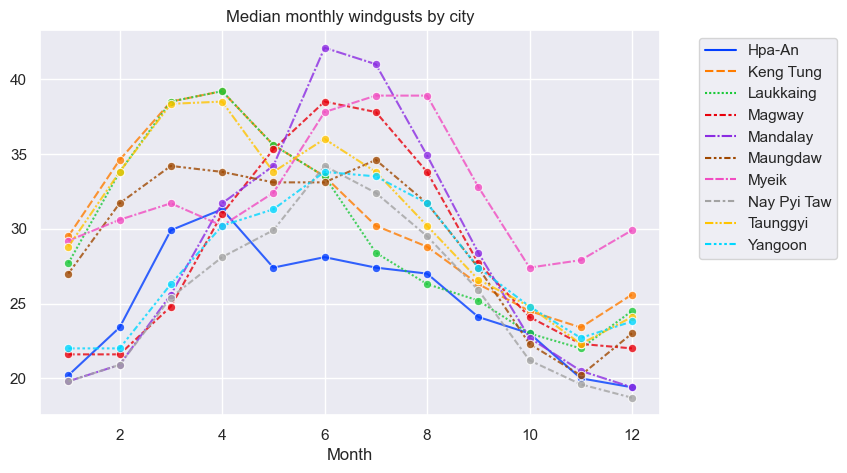

In [41]:
#change in the months for average windsgust in every city
#group by
windgusts_year_by_city= (
    data.groupby(['month', 'city'])['windgusts_10m_max'].median()
    .to_frame()
    .reset_index()
    .sort_values('month', ascending= True)
    .reset_index(drop=True)
)

#create a pivot table
windgusts_by_year= windgusts_year_by_city.pivot(index= 'month', columns='city', values='windgusts_10m_max')
windgusts_by_year

#creating the lineplot
g= sns.lineplot(windgusts_by_year, marker= 'o', alpha= 0.8, palette='bright')
g.set_xlabel('Month')
plt.title('Median monthly windgusts by city')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.show()

In the Windgust plot we don't observe many similarities between cities.

Several cities such as: Keng Tung, Laukkaing, Taunggyi and Hpa-An have their highest peaks between March and April.

And another group of cities (Mandalay, Magway, Myeik) have it between June and August.

In [42]:
#scatterplot for windgust and windspeed in every city
#group the data
windspeed_and_windgust= data.groupby(['year', 'month', 'city'])[['windgusts_10m_max', 'windspeed_10m_max']].median()
windspeed_and_windgust.reset_index()


,year,month,city,windgusts_10m_max,windspeed_10m_max
0,2010,1,Hpa-An,20.2,7.7
1,2010,1,Keng Tung,31.0,9.7
2,2010,1,Laukkaing,26.3,5.9
3,2010,1,Magway,21.6,9.0
4,2010,1,Mandalay,20.2,9.2
...,...,...,...,...,...
1615,2023,6,Maungdaw,33.1,18.9
1616,2023,6,Myeik,39.2,14.5
1617,2023,6,Nay Pyi Taw,33.5,13.8
1618,2023,6,Taunggyi,34.9,9.8


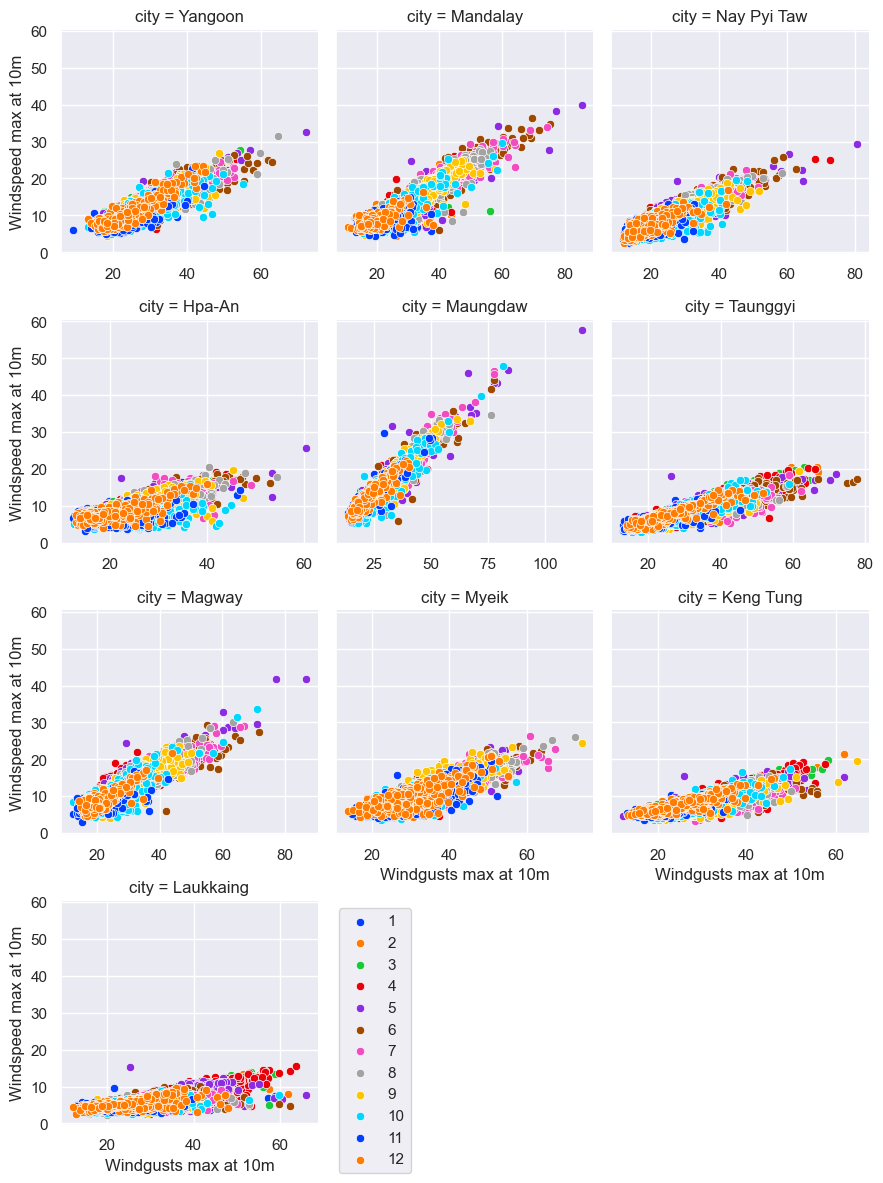

In [43]:
#scatter plot windspeed vs. windgusts
# Create a scatter plot for each city
sns.set(style="ticks")
sns.set(rc = {'figure.figsize':(10,7)})
g = sns.FacetGrid(data=data, col="city", sharex= False, col_wrap=3, hue='month', palette='bright')
g.map(sns.scatterplot, "windgusts_10m_max", "windspeed_10m_max")

# Add labels and title
g.set_axis_labels("Windgusts max at 10m", "Windspeed max at 10m")
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.show()

In the scatter plot we can see more clearly the relationship between the two variables. In some cities it is smaller, but a directly proportional relationship is still observed.

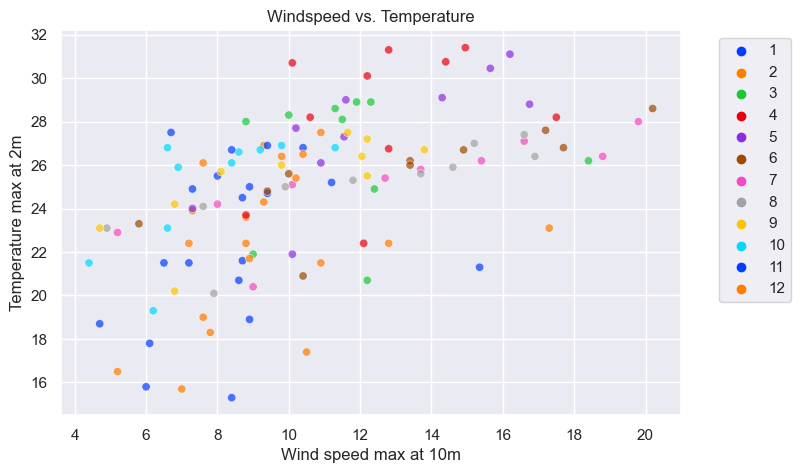

In [44]:
#relationship between temperature and windspeed

#scatterplot for windspeed and temperature in every city
#group the data
windspeed_and_temp= data.groupby(['month', 'city'])[['windspeed_10m_max', 'temperature_2m_mean']].median()
windspeed_and_temp.reset_index()

#scatterplot
sns.set(rc = {'figure.figsize':(8,5)})
g= sns.scatterplot(data= windspeed_and_temp, x= 'windspeed_10m_max', y='temperature_2m_mean', palette= 'bright',
                      hue= 'month', alpha= 0.7)
g.set_xlabel('Wind speed max at 10m')
g.set_ylabel('Temperature max at 2m')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.title('Windspeed vs. Temperature')
plt.show()



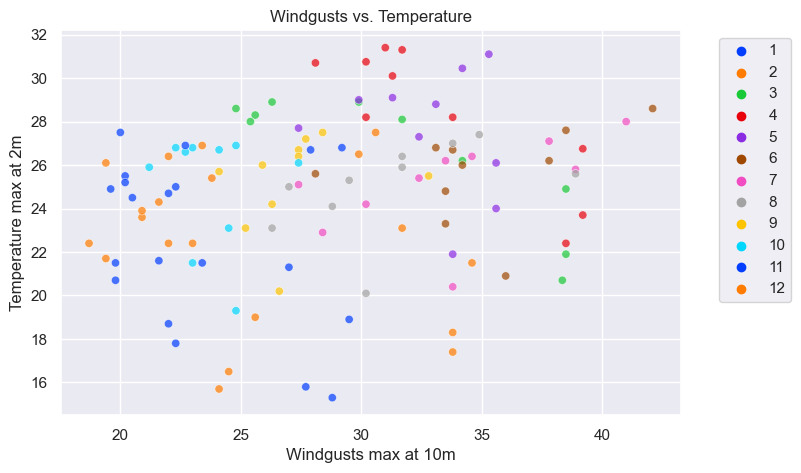

In [45]:
#relationship between temperature and windgust
#scatterplot for windgust and temperature in every city
#group the data
windgusts_and_temp= data.groupby(['month', 'city'])[['windgusts_10m_max', 'temperature_2m_mean']].median()
windgusts_and_temp.reset_index()

#scatterplot
sns.set(rc = {'figure.figsize':(8,5)})
g= sns.scatterplot(data= windgusts_and_temp, x= 'windgusts_10m_max', y='temperature_2m_mean', palette= 'bright',
                      hue= 'month', alpha= 0.7)
g.set_xlabel('Windgusts max at 10m')
g.set_ylabel('Temperature max at 2m')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.title('Windgusts vs. Temperature')
plt.show()

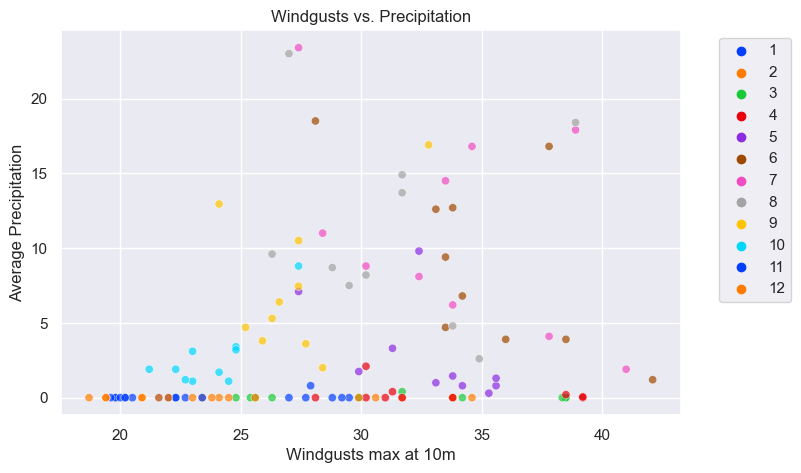

In [46]:
#relationship between precipitation and windgust
#scatterplot for windgust and temperature in every city
#group the data
windgusts_and_temp= data.groupby(['month', 'city'])[['windgusts_10m_max', 'precipitation_sum']].median()
windgusts_and_temp.reset_index()

#scatterplot
sns.set(rc = {'figure.figsize':(8,5)})
g= sns.scatterplot(data= windgusts_and_temp, x= 'windgusts_10m_max', y='precipitation_sum', palette= 'bright',
                      hue= 'month', alpha= 0.7)
g.set_xlabel('Windgusts max at 10m')
g.set_ylabel('Average Precipitation')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.title('Windgusts vs. Precipitation')
plt.show()

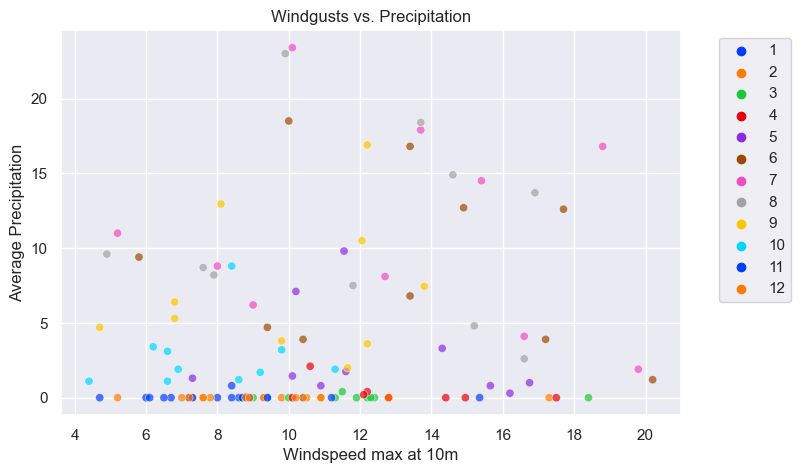

In [47]:
#relationship between precipitation and windspeed
#scatterplot for windgust and temperature in every city
#group the data
windgusts_and_temp= data.groupby(['month', 'city'])[['windspeed_10m_max', 'precipitation_sum']].median()
windgusts_and_temp.reset_index()

#scatterplot
sns.set(rc = {'figure.figsize':(8,5)})
g= sns.scatterplot(data= windgusts_and_temp, x= 'windspeed_10m_max', y='precipitation_sum', palette= 'bright',
                      hue= 'month', alpha= 0.7)
g.set_xlabel('Windspeed max at 10m')
g.set_ylabel('Average Precipitation')
plt.legend(bbox_to_anchor = ( 1.05 , 1 ), loc = 2)
plt.title('Windgusts vs. Precipitation')
plt.show()

In the Windspeed vs. Temperature scatter plot we can see a certain relationship, as the temperature increases the wind speed also increases, however, the data is a bit scattered.

In the Windgusts vs. Temperature plot the data is even more scattered.

We do not observe a kind of relationship between precipitation, windspeed and windgusts in general. But in the months from June to September we can observe that if the precipitation is higher the wind speed tends to increase, but the data are also scattered.